In [ ]:
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt

In [ ]:
model = keras.models.load_model(r'cnn.h5')

In [ ]:
model

In [ ]:
a = (50,50,3)
b = [1,*a]
b

#In the above code, you created a tuple with the value (50, 50, 3).
# You then created a list by adding the value 1 to the beginning of the tuple using the unpacking operator.aba*

[1, 50, 50, 3]

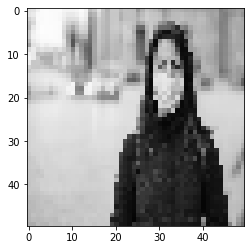

In [ ]:
img_path = 'masked_person.jpg'

master_I= cv2.imread(img_path) #Read the image from the given path using the OpenCV library.
master_I = cv2.cvtColor(master_I,cv2.COLOR_BGR2RGB)# Converts the color space of the image from BGR (OpenCV's default color) to RGB (the color used by Matplotlib).
orig_image = cv2.cvtColor(master_I, cv2.COLOR_RGB2GRAY)#Converts RGB images to grayscale images.
image = cv2.resize(orig_image,(50,50))#Resize grayscale image to 50x50 size. This ensures that the image is the right size to include in the predictive model.
image = image.reshape((*image.shape,1)) #Add a 3rd dimension to the grayscale image to form a 3D grayscale image.
image = tf.convert_to_tensor(image)  # Convert images from NumPy array to Tensor for use in Tensorflow.

# Convert grayscale images to RGB images. This is necessary because the model requires an image with 3 color channels to predict.
#.numpy()/255.': Convert images from Tensor to NumPy array and normalize pixel values between 0 and 1.
image = tf.image.grayscale_to_rgb(image).numpy()/255.

# we need to reshape image to [batch_size, row, col, channel] to feed it to model for prediction
final_image = image.reshape(1, *image.shape) #Add batch_size dimension to the image so that it can be included in the model for prediction

plt.imshow(final_image[0],cmap='gray')

#. This image has a size of 50x50 and 3 color channels, but is only displayed as a grayscale image by 'cmap='gray''.


In [ ]:
#Returns the size of the first image in the batch
final_image[0].shape

(50, 50, 3)

In [ ]:
#make predictions on the data using the model loaded from the file
model.predict(final_image)

array([[0.24733506, 0.7526649 ]], dtype=float32)

In [ ]:
is_mask = tf.math.argmax(model.predict(final_image),1).numpy()[0] # it gives the index value of maximum
is_mask

1

The meaningful snippet is to find whether the model predicted the image to be masked (1) or unmasked (0). The variable will store this result, and its value will be 0 or 1, depending on the model's prediction


-Returns 1 : yes, this picture have masked

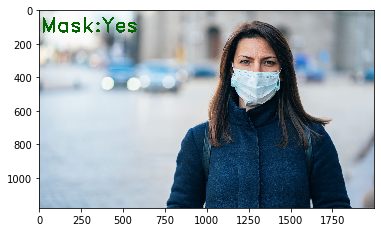

In [ ]:
#The function is defined to display an image with a text "Mask:Yes" located in the upper-left corner if
#there is a value of 1 (i.e. masked prediction). If there is a value of 0 (i.e. prediction without masks), the image will be displayed without text.
def mask(img):
    if is_mask:
        plt.imshow(cv2.putText(img,
                    'Mask:Yes', (10,130),
                    fontFace=cv2.FONT_HERSHEY_DUPLEX,
                    fontScale=4,
                    color=(0,100,0),thickness=7))
    else:
        plt.imshow(img)

mask(master_I)

#1: If there is a value of 1, the function displays an image with the text "Mask:Yes" located in the upper-left corner.is_maskmaster_I

#2: If there is a value of 0, the function displays the image without text.is_maskmaster_I